In [42]:
%pip install catboost
%pip install ipywidgets
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Данные


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [45]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Drop rows with missing data across all columns
    data = data.dropna()
    # Drop columns: 'mainroad', 'prefarea'
    data = data.drop(columns=['mainroad', 'prefarea'])
    return data

data = clean_data(data.copy())
data

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,furnished


<Figure size 1200x600 with 0 Axes>

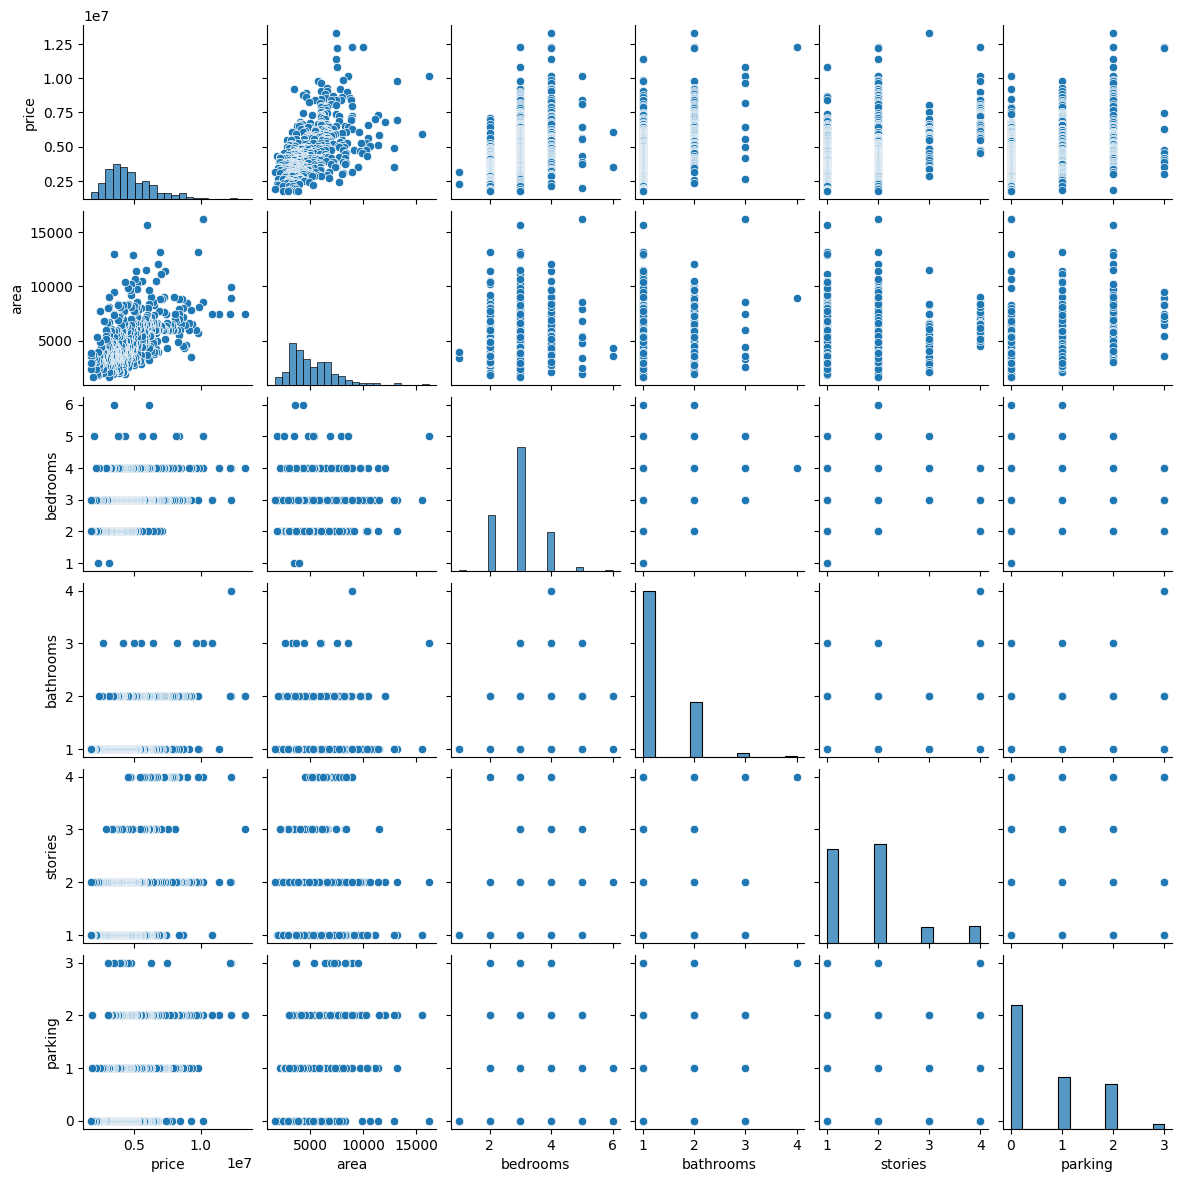

In [46]:
# Строим график для просмотра корреляций
plt.figure(figsize=(12,6))
sns.pairplot(data, diag_kind="hist", height=2)
plt.show()

In [47]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Replace all instances of "furnished" with "2" in column: 'furnishingstatus'
    data.loc[data['furnishingstatus'].str.lower() == "furnished".lower(), 'furnishingstatus'] = "2"
    # Replace all instances of "semi-furnished" with "1" in column: 'furnishingstatus'
    data.loc[data['furnishingstatus'].str.lower() == "semi-furnished".lower(), 'furnishingstatus'] = "1"
    # Replace all instances of "unfurnished" with "0" in column: 'furnishingstatus'
    data.loc[data['furnishingstatus'].str.lower() == "unfurnished".lower(), 'furnishingstatus'] = "0"
    # Change column type to int64 for column: 'furnishingstatus'
    data = data.astype({'furnishingstatus': 'int64'})
    # Replace all instances of "no" with "0" in columns: 'guestroom', 'basement' and 2 other columns
    data['guestroom'] = data['guestroom'].str.replace("no", "0", case=False, regex=False)
    data['basement'] = data['basement'].str.replace("no", "0", case=False, regex=False)
    data['hotwaterheating'] = data['hotwaterheating'].str.replace("no", "0", case=False, regex=False)
    data['airconditioning'] = data['airconditioning'].str.replace("no", "0", case=False, regex=False)
    # Replace all instances of "yes" with "1" in columns: 'guestroom', 'basement' and 2 other columns
    data['guestroom'] = data['guestroom'].str.replace("yes", "1", case=False, regex=False)
    data['basement'] = data['basement'].str.replace("yes", "1", case=False, regex=False)
    data['hotwaterheating'] = data['hotwaterheating'].str.replace("yes", "1", case=False, regex=False)
    data['airconditioning'] = data['airconditioning'].str.replace("yes", "1", case=False, regex=False)
    return data

data = clean_data(data.copy())
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,1,2,2
1,12250000,8960,4,4,4,0,0,0,1,3,2
2,12250000,9960,3,2,2,0,1,0,0,2,1
3,12215000,7500,4,2,2,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,0,1,2,2


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  furnishingstatus  545 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 47.0+ KB


In [49]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Change column type to int64 for columns: 'guestroom', 'basement' and 2 other columns
    data = data.astype({'guestroom': 'int64', 'basement': 'int64', 'hotwaterheating': 'int64', 'airconditioning': 'int64'})
    return data

data = clean_data(data.copy())
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,1,2,2
1,12250000,8960,4,4,4,0,0,0,1,3,2
2,12250000,9960,3,2,2,0,1,0,0,2,1
3,12215000,7500,4,2,2,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,0,1,2,2


In [50]:
Regions = pd.read_csv('out.csv')

In [51]:
Regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  183 non-null    int64 
 1   Regions     183 non-null    object
 2   rank        183 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


In [52]:
Regions = Regions.drop("Unnamed: 0", axis=1)

In [53]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(Regions):
    # Drop duplicate rows in column: 'Regions'
    Regions = Regions.drop_duplicates(subset=['Regions'])
    # Sort by column: 'rank' (descending)
    Regions = Regions.sort_values(['rank'], ascending=[False])
    return Regions

Regions = clean_data(Regions.copy())
Regions = Regions.drop([93], axis=0)
Regions.head()

,Regions,rank
73,Республика Тыва,23
58,Нижегородская область,23
89,Амурская область,23
82,Дальневосточный федеральный округ,23
86,Камчатский край,23


In [54]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Sort by column: 'price' (descending)
    data = data.sort_values(['price'], ascending=[False])
    return data

data_clean = clean_data(data.copy())
data_clean.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,1,2,2
2,12250000,9960,3,2,2,0,1,0,0,2,1
1,12250000,8960,4,4,4,0,0,0,1,3,2
3,12215000,7500,4,2,2,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,0,1,2,2


In [56]:
Regions = Regions.reset_index(drop=True)

In [118]:
rr = Regions["rank"]
rr

0     23
1     23
2     23
3     23
4     23
      ..
89     2
90     2
91     0
92     0
93     0
Name: rank, Length: 94, dtype: int64

In [119]:
rr = rr.to_numpy()
rr

array([23, 23, 23, 23, 23, 23, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 19, 16, 16, 15, 15, 15, 15, 14, 13, 13, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10,  9,  8,  8,  8,  8,  8,
        8,  8,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  0,  0,  0])

In [74]:
Regions.to_csv('out.csv', index=False)

In [120]:
rr = np.concatenate((rr, rr, rr, rr, rr, rr))

In [125]:
rr = np.sort(rr)
rr = rr[::-1]

In [128]:
print(len(rr), len(data))

564 545


In [133]:
rr = np.delete(rr, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
len(rr)

545

In [136]:
ser_rr = pd.Series(rr)
ser_rr = {"Region Rank": ser_rr}

In [137]:
ser_rr

{'Region Rank': 0      23
 1      23
 2      23
 3      23
 4      23
        ..
 540     0
 541     0
 542     0
 543     0
 544     0
 Length: 545, dtype: int64}

In [146]:
df = pd.DataFrame(ser_rr)
df = pd.concat([data, df], axis=1)
df

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Region Rank
0,13300000,7420,4,2,3,0,0,0,1,2,2,23
1,12250000,8960,4,4,4,0,0,0,1,3,2,23
2,12250000,9960,3,2,2,0,1,0,0,2,1,23
3,12215000,7500,4,2,2,0,1,0,1,3,2,23
4,11410000,7420,4,1,2,1,1,0,1,2,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2,0


In [147]:
df

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Region Rank
0,13300000,7420,4,2,3,0,0,0,1,2,2,23
1,12250000,8960,4,4,4,0,0,0,1,3,2,23
2,12250000,9960,3,2,2,0,1,0,0,2,1,23
3,12215000,7500,4,2,2,0,1,0,1,3,2,23
4,11410000,7420,4,1,2,1,1,0,1,2,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2,0


# Создание модели
